# Procesamiento de datos general para ambos ejemplos de red neuronal

- Johan Stiven Ricardo - A00370269
- Camilo Campaz Jimenez - A00370258


In [1]:
#Montar google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
import cv2
import pathlib
import random
import glob
import os
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow import keras
from keras.layers import Dropout

In [8]:
path = '/content/drive/MyDrive/pizza_not_pizza'
data_dir=pathlib.Path(path)

In [9]:
#Vemos la cantidad de imagenes que tendremos en nuestro drive
image=glob.glob("/content/drive/MyDrive/pizza_not_pizza/*/*.jpg")
image=pd.Series(image)
print("No of images :",len(image))

No of images : 1966


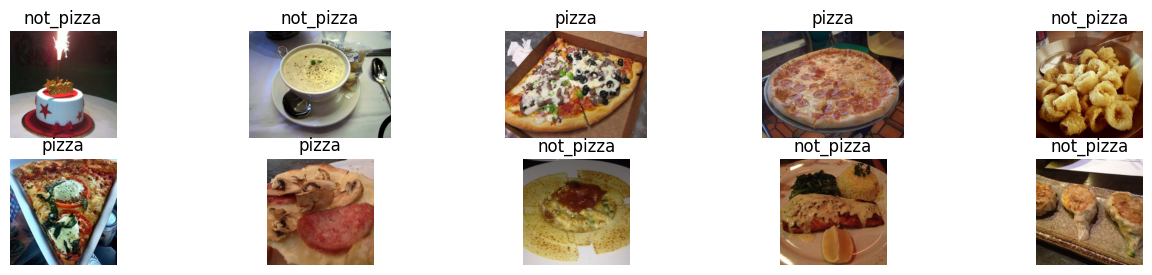

In [10]:
#Marcamos cada una de las imagenes según su calse
# Obtiene una lista de las clases de imágenes en el directorio especificado
classes = os.listdir(path)

# Crea una figura para mostrar las imágenes
plt.figure(figsize=(16, 8))

# Itera sobre un rango de 10 veces para mostrar 10 imágenes
for x in range(10):
    # Genera un número aleatorio para seleccionar una clase de imagen
    i = random.randint(0, 1)
    # Obtiene la lista de imágenes en la clase seleccionada
    images = os.listdir(path + '/' + classes[i])
    # Genera un número aleatorio para seleccionar una imagen de la lista
    j = random.randint(0, 900)
    # Lee la imagen seleccionada utilizando OpenCV
    image = cv2.imread(path + '/' + classes[i] + '/' + images[j])
    # Convierte el formato de color de la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Crea un subplot en la figura para mostrar la imagen
    ax = plt.subplot(5, 5, x + 1)
    # Muestra la imagen en el subplot
    plt.imshow(image)
    # Establece el título del subplot como la clase de la imagen
    plt.title(classes[i])
    # Desactiva los ejes en el subplot
    plt.axis("off")

# Muestra la figura con las imágenes
plt.show()

In [11]:
# Se importa la clase ImageDataGenerator de Keras para la generación de datos de imágenes para el entrenamiento.
# Se especifica que se debe reescalar los valores de píxeles de las imágenes dividiéndolos por 255 para normalizarlos.
# Se divide el conjunto de datos en un 80% para entrenamiento y un 20% para validación.
train_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Se crea un generador de datos de entrenamiento utilizando el método flow_from_directory de train_data.
# Se especifica el directorio que contiene las imágenes.
# Se indica que se utilizará un 80% de los datos para entrenamiento (subset='training').
# Se establece el tamaño al que se redimensionarán las imágenes (224x224 píxeles).
# Se establece el tamaño del lote (batch_size) en 32 imágenes.
train_ds = train_data.flow_from_directory(
    path,
    subset='training',
    target_size=(224, 224),
    batch_size=32
)

# Se crea un generador de datos de validación utilizando el método flow_from_directory de train_data.
# Se especifica el directorio que contiene las imágenes.
# Se indica que se utilizará un 20% de los datos para validación (subset='validation').
# Se establece el tamaño al que se redimensionarán las imágenes (224x224 píxeles).
# Se establece el tamaño del lote (batch_size) en 32 imágenes.
test_ds = train_data.flow_from_directory(
    path,
    subset='validation',
    target_size=(224, 224),
    batch_size=32
)

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


# **1. Red neuronal basada en el codigo que está en clase**

In [12]:
# Obtener un lote de datos de entrenamiento
batch_images, batch_labels = train_ds.next()

# Convertir las imágenes en un formato adecuado para DataFrame
image_data = batch_images.reshape(batch_images.shape[0], -1)

# Convertir las etiquetas a un array unidimensional
labels = np.argmax(batch_labels, axis=1)

# Crear un DataFrame con los datos de las imágenes y sus etiquetas
columns = [f'pixel_{i}' for i in range(image_data.shape[1])]
df_train = pd.DataFrame(image_data, columns=columns)
df_train['label'] = labels

# Mostrar el DataFrame
df_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_150519,pixel_150520,pixel_150521,pixel_150522,pixel_150523,pixel_150524,pixel_150525,pixel_150526,pixel_150527,label
0,0.054902,0.027451,0.003922,0.050980,0.031373,0.007843,0.054902,0.035294,0.019608,0.050980,...,0.156863,0.105882,0.074510,0.266667,0.200000,0.172549,0.482353,0.407843,0.384314,0
1,0.498039,0.796079,0.921569,0.384314,0.756863,0.945098,0.345098,0.772549,1.000000,0.301961,...,0.529412,0.427451,0.298039,0.513726,0.411765,0.274510,0.513726,0.411765,0.266667,1
2,0.654902,0.270588,0.117647,0.639216,0.258824,0.121569,0.658824,0.294118,0.164706,0.705882,...,0.176471,0.098039,0.054902,0.250980,0.164706,0.121569,0.278431,0.184314,0.137255,1
3,0.168627,0.117647,0.054902,0.172549,0.121569,0.058824,0.176471,0.125490,0.062745,0.180392,...,0.576471,0.262745,0.133333,0.513726,0.203922,0.082353,0.458824,0.149020,0.027451,1
4,0.015686,0.039216,0.094118,0.011765,0.035294,0.090196,0.023529,0.050980,0.113725,0.007843,...,0.117647,0.286275,0.423529,0.098039,0.266667,0.403922,0.105882,0.262745,0.403922,1


In [13]:
# Obtener un lote de datos de prueba
batch_images, batch_labels = test_ds.next()

# Convertir las imágenes en un formato adecuado para DataFrame
image_data = batch_images.reshape(batch_images.shape[0], -1)

# Convertir las etiquetas a un array unidimensional
labels = np.argmax(batch_labels, axis=1)

# Crear un DataFrame con los datos de las imágenes y sus etiquetas
columns = [f'pixel_{i}' for i in range(image_data.shape[1])]
df_test = pd.DataFrame(image_data, columns=columns)
df_test['label'] = labels

# Mostrar el DataFrame
df_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_150519,pixel_150520,pixel_150521,pixel_150522,pixel_150523,pixel_150524,pixel_150525,pixel_150526,pixel_150527,label
0,0.125490,0.243137,0.376471,0.125490,0.243137,0.376471,0.121569,0.239216,0.372549,0.117647,...,0.109804,0.184314,0.243137,0.058824,0.109804,0.145098,0.015686,0.058824,0.074510,0
1,0.243137,0.282353,0.380392,0.235294,0.258824,0.313726,0.247059,0.247059,0.294118,0.243137,...,0.250980,0.125490,0.027451,0.235294,0.109804,0.019608,0.223529,0.098039,0.000000,1
2,0.015686,0.054902,0.062745,0.031373,0.066667,0.086275,0.027451,0.062745,0.098039,0.027451,...,0.384314,0.568627,0.749020,0.384314,0.568627,0.749020,0.392157,0.576471,0.749020,1
3,0.878431,0.862745,0.749020,0.894118,0.882353,0.752941,0.886275,0.870588,0.721569,0.898039,...,0.380392,0.411765,0.486275,0.349020,0.380392,0.454902,0.305882,0.337255,0.411765,0
4,0.964706,0.843137,0.619608,0.964706,0.843137,0.619608,0.976471,0.854902,0.631373,0.968628,...,0.733333,0.517647,0.266667,0.737255,0.521569,0.270588,0.733333,0.517647,0.266667,1


In [14]:
def load_dataset(df_test, df_train):
    """
    Carga el conjunto de datos desde los DataFrames proporcionados.

    Argumentos:
    df_test: DataFrame que contiene los datos de prueba.
    df_train: DataFrame que contiene los datos de entrenamiento.

    Retorna:
    train_set_x_orig: Array numpy de los features de entrenamiento.
    train_set_y_orig: Array numpy de las etiquetas de entrenamiento.
    test_set_x_orig: Array numpy de los features de prueba.
    test_set_y_orig: Array numpy de las etiquetas de prueba.
    classes: Array numpy que contiene las clases ['pizza', 'not_pizza'].
    """

    # Se extraen los features de entrenamiento y las etiquetas de entrenamiento del DataFrame de entrenamiento.
    train_set_x_orig = np.array(df_train.drop('label', axis=1)) # Los features de entrenamiento
    train_set_y_orig = np.array(df_train['label']) # Las etiquetas de entrenamiento

    # Se extraen los features de prueba y las etiquetas de prueba del DataFrame de prueba.
    test_set_x_orig = np.array(df_test.drop('label', axis=1)) # Los features de prueba
    test_set_y_orig = np.array(df_test['label']) # Las etiquetas de prueba

    # Se define la lista de clases.
    classes = np.array(["pizza", "not_pizza"])

    # Se ajustan las dimensiones de las etiquetas para que coincidan con las expectativas del modelo.
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [15]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset(df_test,df_train)

In [17]:
# Aplanar el arreglo de entrenamiento
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
# Aplanar el arreglo de prueba
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))



train_set_x_flatten shape: (150528, 32)
train_set_y shape: (1, 32)
test_set_x_flatten shape: (150528, 32)
test_set_y shape: (1, 32)
sanity check after reshaping: [0.05490196 0.02745098 0.00392157 0.0509804  0.03137255]


# Reshape para los datos de prueba y entrenamiento

In [18]:
# Se aplanan los arreglos de características de entrenamiento y prueba.
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Se imprimen las formas de los arreglos para verificar la transformación.
print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))
print("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (150528, 32)
train_set_y shape: (1, 32)
test_set_x_flatten shape: (150528, 32)
test_set_y shape: (1, 32)
sanity check after reshaping: [0.05490196 0.02745098 0.00392157 0.0509804  0.03137255]


In [19]:
# Se normalizan los valores de píxeles de los conjuntos de datos de entrenamiento y prueba dividiéndolos por 255.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

# CONSTRUYENDO LAS PARTES DE LA RED NEURONAL

---



###Funciones auxiliares

In [20]:
def sigmoid(z):
    """
    Calcula la función sigmoide de z.

    Argumentos:
    z -- Un escalar o un array numpy de cualquier tamaño.

    Retorna:
    s -- sigmoide(z)
    """
    # Se calcula la sigmoide de z.
    s = 1 / (1 + np.exp(-z))

    return s

In [21]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### Inicializar parametros

In [22]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [23]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


### Forward and Backward propagation

In [24]:
# GRADED FUNCTION: propagate
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X) + b)              # compute activation
    cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = 1 / m * np.dot(X, (A - Y).T)
    db = 1 / m * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [25]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


### Optimizacion

In [26]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [27]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 5.801545
w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


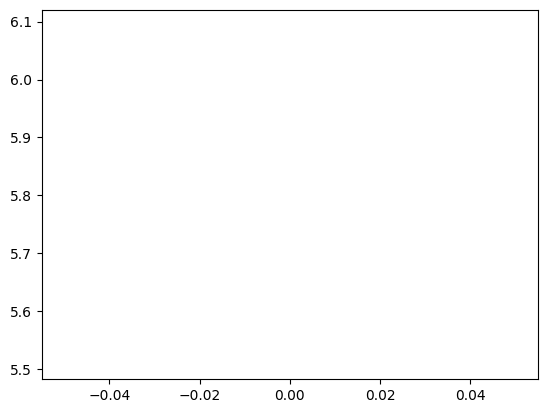

In [28]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.show()

# Funcion de prediccion

In [29]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X) + b)           # Dimentions = (1, m)
    ### END CODE HERE ###

    #### WORKING SOLUTION 1: USING IF ELSE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #if (A[0,i] >= 0.5):
        #    Y_prediction[0, i] = 1
        #else:
        #    Y_prediction[0, i] = 0
        ### END CODE HERE ###

    #### WORKING SOLUTION 2: ONE LINE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #Y_prediction[0, i] = 1 if A[0,i] >=0.5 else 0
        ### END CODE HERE ###

    #### WORKING SOLUTION 3: VECTORISED IMPLEMENTATION ####
    Y_prediction = (A >= 0.5) * 1.0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [30]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


# Combinacion de todas las funciones en un modelo

In [31]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [32]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = False)

train accuracy: 53.125 %
test accuracy: 46.875 %


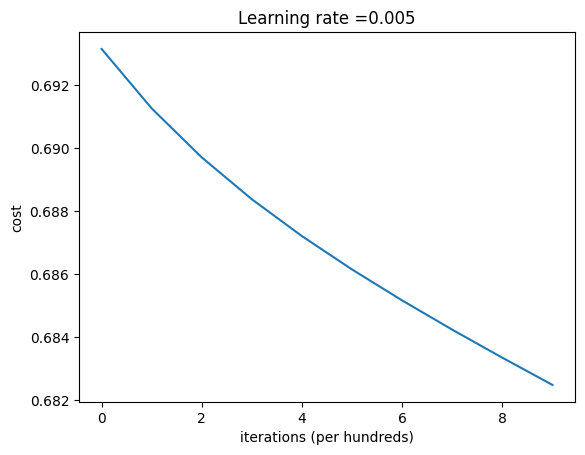

In [33]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

# **2.Version usando liberias de tensor flow**:

Todado de https://www.kaggle.com/code/rasikagurav/pizza-or-not-pizza

In [46]:
from tensorflow import keras
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [47]:
mobilenet=MobileNet(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

In [48]:
for layers in mobilenet.layers:
    layers.trainable=False

In [49]:
# Creamos un modelo secuencial, que permite apilar capas de manera secuencial
model = Sequential()

# Añadimos la arquitectura pre-entrenada de MobileNet al modelo.
# Esto agregará todas las capas de MobileNet a nuestro modelo,
# pero no incluirá la capa de clasificación final.
model.add(mobilenet)

# Añadimos una capa de pooling global, que realiza un promedio global de cada canal en la salida de la última capa convolucional.
# Esto reduce la dimensionalidad de los datos conservando las características más importantes.
model.add(GlobalAveragePooling2D())

# Aplanamos los datos para prepararlos para la capa densa (totalmente conectada).
model.add(Flatten())

# Añadimos una capa densa con 1024 neuronas y función de activación ReLU.
model.add(Dense(1024, activation='relu'))

# Añadimos otra capa densa con 512 neuronas y función de activación ReLU.
model.add(Dense(512, activation='relu'))

# Añadimos la capa de salida con 2 neuronas (para las dos clases) y función de activación softmax.
# Esta capa realizará la clasificación final y generará las probabilidades de pertenencia a cada clase.
# Le damos el nombre 'classification' para facilitar su identificación.
model.add(Dense(2, activation='softmax', name='classification'))

In [54]:
# Compilamos el modelo especificando el optimizador, la función de pérdida y las métricas de evaluación.

# Seleccionamos el optimizador SGD (Gradiente Descendente Estocástico) con una tasa de aprendizaje de 0.001 y un momentum de 0.9.
# El optimizador SGD es un algoritmo popular para la optimización de redes neuronales.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Especificamos la función de pérdida como 'categorical_crossentropy', ya que estamos realizando una clasificación categórica.
# Esta función de pérdida es adecuada para problemas de clasificación con múltiples clases.
loss = 'categorical_crossentropy'

# Definimos las métricas que se utilizarán para evaluar el rendimiento del modelo durante el entrenamiento y la evaluación.
# En este caso, estamos interesados en la precisión (accuracy) del modelo.
metrics = ['accuracy']

# Compilamos el modelo con el optimizador, la función de pérdida y las métricas especificadas.
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Mostramos un resumen del modelo, que incluye información sobre la arquitectura de la red y el número de parámetros.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 2)                

In [ ]:

history=model.fit(train_ds,validation_data=test_ds,epochs=20)

Epoch 1/20
50/50 [==============================] - 330s 7s/step - loss: 0.3417 - accuracy: 0.8634 - val_loss: 0.1946 - val_accuracy: 0.9158
Epoch 2/20
50/50 [==============================] - 92s 2s/step - loss: 0.1747 - accuracy: 0.9295 - val_loss: 0.1532 - val_accuracy: 0.9388
Epoch 3/20
50/50 [==============================] - 92s 2s/step - loss: 0.1477 - accuracy: 0.9435 - val_loss: 0.1496 - val_accuracy: 0.9490
Epoch 4/20
50/50 [==============================] - 93s 2s/step - loss: 0.1240 - accuracy: 0.9498 - val_loss: 0.1522 - val_accuracy: 0.9337
Epoch 5/20
50/50 [==============================] - 89s 2s/step - loss: 0.1032 - accuracy: 0.9619 - val_loss: 0.1260 - val_accuracy: 0.9490
Epoch 6/20
50/50 [==============================] - 91s 2s/step - loss: 0.0824 - accuracy: 0.9727 - val_loss: 0.1264 - val_accuracy: 0.9490
Epoch 7/20
50/50 [==============================] - 92s 2s/step - loss: 0.0750 - accuracy: 0.9752 - val_loss: 0.1210 - val_accuracy: 0.9541
Epoch 8/20
50/50 [=

In [ ]:
# Creamos una figura para graficar las curvas de entrenamiento y validación de la pérdida.

# Creamos una nueva figura para la visualización.
plt.figure()

# Graficamos la pérdida (loss) durante el entrenamiento y la pérdida durante la validación.
plt.plot(history.history['loss'])  # Pérdida en el conjunto de entrenamiento
plt.plot(history.history['val_loss'])  # Pérdida en el conjunto de validación

# Añadimos leyendas para identificar las líneas en la gráfica.
plt.legend(['loss', 'test_loss'], loc='upper right')

# Mostramos la gráfica.
plt.show()


# Creamos una figura para graficar las curvas de entrenamiento y validación de la precisión (accuracy).

# Creamos una nueva figura para la visualización.
plt.figure()

# Graficamos la precisión (accuracy) durante el entrenamiento y la precisión durante la validación.
plt.plot(history.history['accuracy'])  # Precisión en el conjunto de entrenamiento
plt.plot(history.history['val_accuracy'])  # Precisión en el conjunto de validación

# Añadimos leyendas para identificar las líneas en la gráfica.
plt.legend(['accuracy', 'test_accuracy'])

# Mostramos la gráfica.
plt.show()